# Ensembles of Decision Trees

__Ensembles are methods that combine multiple machine learning models to create
more powerful models.__ There are many models in the machine learning literature
that belong to this category, but there are two ensemble models that have proven to
be effective on a wide range of datasets for classification and regression, both of
which use decision trees as their building blocks: __random forests and gradient boosted
decision trees.__

__Import libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split

---

## Random Forests

As we just observed, a main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. A random forest
is __essentially a collection of decision trees, where each tree is slightly different from
the others__. The idea behind random forests is that each tree might do a relatively
good job of predicting, but will likely overfit on part of the data. If we build many
trees, __all of which work well and overfit in different ways, we can reduce the amount
of overfitting by averaging their results__. This reduction in overfitting, while retaining
the predictive power of the trees, can be shown using rigorous mathematics

### Building Random Forest

- Algorithms will make different random trees that independent from each other. 
- Decide the number of trees to be built (n_estimators)
- To build a tree, we first take what is called a bootstrap sample of our data. from our n_samples we repeatedly draw an example with replacement, n_samples times. 
- ex: if we want to make a bootstrap sample of the list ['a', 'b', 'c', 'd'], a possible sample would be ['b', 'd', 'd', 'c'] or ['d', 'a', 'd', 'a'].
- Next a decision tree is built based on this newly created dataset.
- In each node the algorithm randomly selects a subset of the features and looks for the best possible test involving one of these features.
- max_features parameter controls the number of features that are selcted.
- If we set max_features = n_features, that means that each split can look at all features in the dataset, and no randomness will be injected in the feature selection.
- If we set max_features to 1, that means that the splits have no choice at all on which feature to test, and can only search over differentthresholds for the feature that was selected randomly.
- Therefore, a high max_features means that the trees in the random forest will be quite similar, and they will beable to fit the data easily, using the most distinctive features. A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well.
- To make a prediction using the random forest, the algorithm first makes a prediction for every tree in the forest. For regression, we can average these results to get our final prediction. For classification, a “soft voting” strategy is used. This means each algorithm makes a “soft” prediction, providing a probability for each possible output label. The probabilities predicted by all the trees are averaged, and the class with thehighest probability is predicted.


### Analyzing Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train);

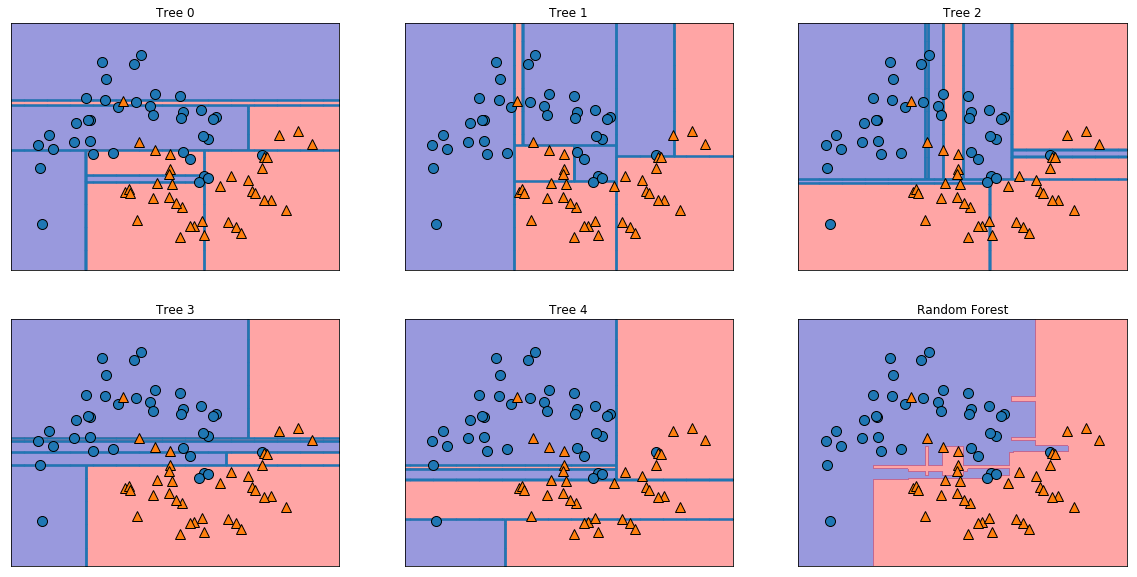

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

Note that each tree seperate the class region differently, each of them makes some mistakes differently.

In [9]:
# let's apply n_estimators=100
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train);

In [10]:
print("Accuracy on training set: {}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.972027972027972


In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

Similarly to the decision tree, the random forest provides feature importances, which
are computed by aggregating the feature importances over the trees in the forest. Typically,
the feature importances provided by the random forest are more reliable than
the ones provided by a single tree.

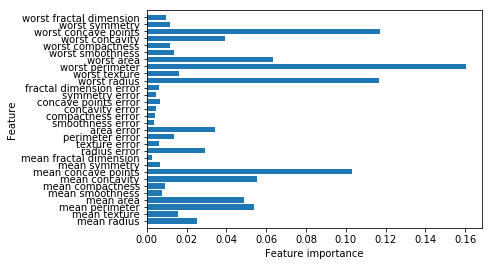

In [12]:
plot_feature_importances_cancer(forest)

### Streghts, Weaknesses, and Parameters

- Strengths:
    - Most widely used machine learning methods.
    - Very powerful, often work well without heavy tuning.
    - No need for scaling.
    - Share benefits from decision tree.
- Weaknesses:
    - Large datasets -> time consuming
    - Don't tend to perform well on very high dimensional, sparse data (linear model is more appropriate).
    - Require more memory and slower to train and to predict than linear models.
- Parameters:
    - n_estimators: larger always better, but more trees need more memory and more time to train.
    - max_features: determines how random each tree is and smaller value reduces overfitting.
    - max_depth (for preprunning)
- Another points:
    - The choosing random_state can drastically change the outcome.
    - The more tress there are, the more robust the model is to the choice of random_state
    - If time and memory are important, use linear models.
    - Common rule of thumb, build as many as you have time/memory for.
    - Is is a good rule of thumb to use default values: max_features=sqrt(n_features) for classification and max_features=n_features for regression.
    - One reason to use decision tree is the easy to understand representation. 

---

## Gradient Boosted Regression Trees (Gradient Boosting Machines)

- Another ensemble learning that combines multiple decision trees to create a more powerful model.
- Works by building tree in a serial manner, where each tree tries to correct the mistakes of the previous one.
- By default, there is no randomization, instead strong preprunning is used.
- Use very shallow tree of depth one to five, which makes it efficient in memory and makes prediction faster.
- The main idea is to combine weak learners (shallow trees), where each tree can only provide good predictions on part of the data, and gradually add more trees to improve performance.
- Widely used in industry, frequently the winning entries in machine learning competitions.
- More sensitive to parameters than random forest, but provide better accuracy if the paremeters tuning are correct.
- Important parameter: learning_rate, which controls how strong each tree try to correct the previous tree's mistakes.
- High learning -> complex model, each tree can make stronger corrections.
- Parameter: n_estimators -> model complexity.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.0
Accuracy on test set: 0.958041958041958


100% score on training set -> a sign that probably the model is overfitting. To reduce overfitting, we can use preprunning by limiting the maximum depth or lower the learning rate.

In [14]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.9906103286384976
Accuracy on test set: 0.972027972027972


In [15]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.965034965034965


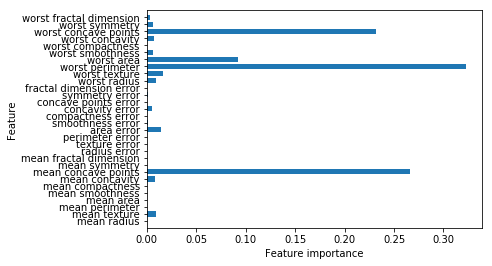

In [16]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- GradientBoostingClassifier ignored some of the features. 
- A common approach is first try random forest, which work quite robustly.
- If time and memory are imporant, try gradient boosted regression trees.
- Good to learn: XGBOOST

### Strengths, Weaknesses, and Parameters

- Strenghts:
    - Among the most powerful and widely used models for supervised learning.
    - Same as other tree implementation algorithm, gbrt works well without scaling.
- Weaknesses:
    - Requires careful tuning of parameters and may take a long time to train.
    - Doesn't work well on high dimensional sparse data.
- Paremeters:
    - n_estimators
    - learning_rate: control how strong each tree makes correction from previous trees.
    - These two are highly interconnected
    - max_depth: small value(1-5) will reduce model complexity.
    - max_leaf_nodes
- Another points:
    - In contrast to random forest where increasing n_estimators will always better, in gbrt increasing n_estimator will lead the model to be more complex and may be overfit the training set.
    - Good practice: fit n_estimators depending on the time and memory budget and then search over different learning_rates



---

# Important Points:

- Ensembles learning: methods that combine decision tree to make more robust machine learning algorithm.
- Random forest:
    - Use randomization to achieve better result.
    - Attributes: features_importances_
    - Parameters:
        - n_estimators
        - max_leaf_nodes
        - max_depth
        - max_features
- Gradient Boosted Regression Tree:
    - Use learning experience to achive better result.
    - Attributes: feature_importances_
    - Parameters:
        - learning_rate
        - n_estimators
        - max_depth
        - max_leaf_nodes
- Tree implementations model will works well with out scaling.
- Doesn't works well on high dimensional sparse data (use linear models instead).
- Good rule of thumbs:
    - First try random forest
    - If memory and time are important, use gbrt, or try to reduce the model complexity.
    - tune the parameters as time and memory provides.